# Software Carpentry with Python: Part 3

## Plotting using pandas and matplotlib


## Matplotlib package
Matplotlib is a Python package that is widely used throughout the scientific Python community to create high-quality and publication-ready graphics. It supports a wide range of raster and vector graphics formats including PNG, PostScript, EPS, PDF and SVG.

Moreover, matplotlib is the actual engine behind the plotting capabilities of both Pandas and other plotting packages. For example, when we call the .plot method on Pandas data objects, we actually use the matplotlib package.

First, import the pyplot toolbox from the matplotlib library. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Let's read in a different gapminder dataset for plotting:

In [2]:
df = pd.read_csv("data/gapminder_gdp_americas.csv", index_col="country")

In [3]:
df.head()

,continent,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,,
Argentina,Americas,5911.315053,6856.856212,7133.166023,8052.953021,9443.038526,10079.026740,8997.897412,9139.671389,9308.418710,10967.281950,8797.640716,12779.379640
Bolivia,Americas,2677.326347,2127.686326,2180.972546,2586.886053,2980.331339,3548.097832,3156.510452,2753.691490,2961.699694,3326.143191,3413.262690,3822.137084
Brazil,Americas,2108.944355,2487.365989,3336.585802,3429.864357,4985.711467,6660.118654,7030.835878,7807.095818,6950.283021,7957.980824,8131.212843,9065.800825
Canada,Americas,11367.161120,12489.950060,13462.485550,16076.588030,18970.570860,22090.883060,22898.792140,26626.515030,26342.884260,28954.925890,33328.965070,36319.235010
Chile,Americas,3939.978789,4315.622723,4519.094331,5106.654313,5494.024437,4756.763836,5095.665738,5547.063754,7596.125964,10118.053180,10778.783850,13171.638850


We want to plot the GDP by country, over the years. There are a few problems with this DataFrame. There is a continent column-- how would that get plotted? And the column names here aren't clean years, nor are they integers. 

First let's get rid of the continent column. 

In [4]:
df = df.drop(columns=["continent"])
df.head()

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Argentina,5911.315053,6856.856212,7133.166023,8052.953021,9443.038526,10079.026740,8997.897412,9139.671389,9308.418710,10967.281950,8797.640716,12779.379640
Bolivia,2677.326347,2127.686326,2180.972546,2586.886053,2980.331339,3548.097832,3156.510452,2753.691490,2961.699694,3326.143191,3413.262690,3822.137084
Brazil,2108.944355,2487.365989,3336.585802,3429.864357,4985.711467,6660.118654,7030.835878,7807.095818,6950.283021,7957.980824,8131.212843,9065.800825
Canada,11367.161120,12489.950060,13462.485550,16076.588030,18970.570860,22090.883060,22898.792140,26626.515030,26342.884260,28954.925890,33328.965070,36319.235010
Chile,3939.978789,4315.622723,4519.094331,5106.654313,5494.024437,4756.763836,5095.665738,5547.063754,7596.125964,10118.053180,10778.783850,13171.638850


Next we want to edit the column names so we can use the years as a numeric axis. Pandas library has a set of string methods. Functions we can can call on string values. We'll use one called `strip()`, to remove characters from the column names.

In [5]:
# Extract year from last 4 characters of each column name
years = df.columns.str.strip('gdpPercap_')
print(years)

Index(['1952', '1957', '1962', '1967', '1972', '1977', '1982', '1987', '1992',
       '1997', '2002', '2007'],
      dtype='object')


There is also Python string method called `.strip()` you can use on any string, whether or not you're using pandas. You'll see it used often to remove whitespace.

Note these are still strings, and since we're making a plot with numeric axes, we need to convert them to integers.

In [7]:
# Convert year values to integers, saving results back to dataframe
df.columns = years.astype(int)

In [8]:
df.head()

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Argentina,5911.315053,6856.856212,7133.166023,8052.953021,9443.038526,10079.026740,8997.897412,9139.671389,9308.418710,10967.281950,8797.640716,12779.379640
Bolivia,2677.326347,2127.686326,2180.972546,2586.886053,2980.331339,3548.097832,3156.510452,2753.691490,2961.699694,3326.143191,3413.262690,3822.137084
Brazil,2108.944355,2487.365989,3336.585802,3429.864357,4985.711467,6660.118654,7030.835878,7807.095818,6950.283021,7957.980824,8131.212843,9065.800825
Canada,11367.161120,12489.950060,13462.485550,16076.588030,18970.570860,22090.883060,22898.792140,26626.515030,26342.884260,28954.925890,33328.965070,36319.235010
Chile,3939.978789,4315.622723,4519.094331,5106.654313,5494.024437,4756.763836,5095.665738,5547.063754,7596.125964,10118.053180,10778.783850,13171.638850


Let's plot just one country's data. Select the row for Brazil. 

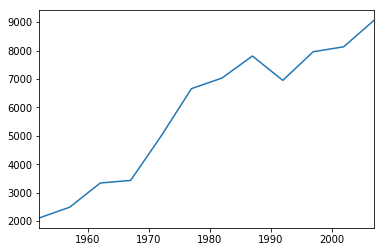

In [9]:
df.loc['Brazil'].plot()

If we try this approach on the entire DataFrame we don't get good results, however. 

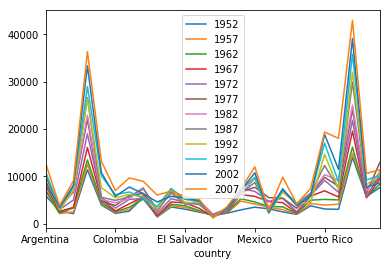

In [10]:
df.plot()

This plot is so ugly! By default, DataFrame.plot plots with the rows as the X axis. We can transpose the data in order to plot multiple series. Our legend is smack in the middle, too. 

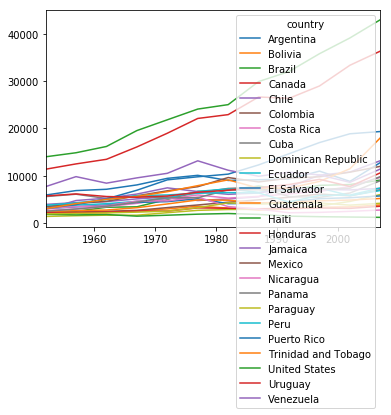

In [11]:
df.T.plot()

We need to do some work to make this presentable: increase the figure size so that the legend for the 26 countries fits, add labels and a title. 

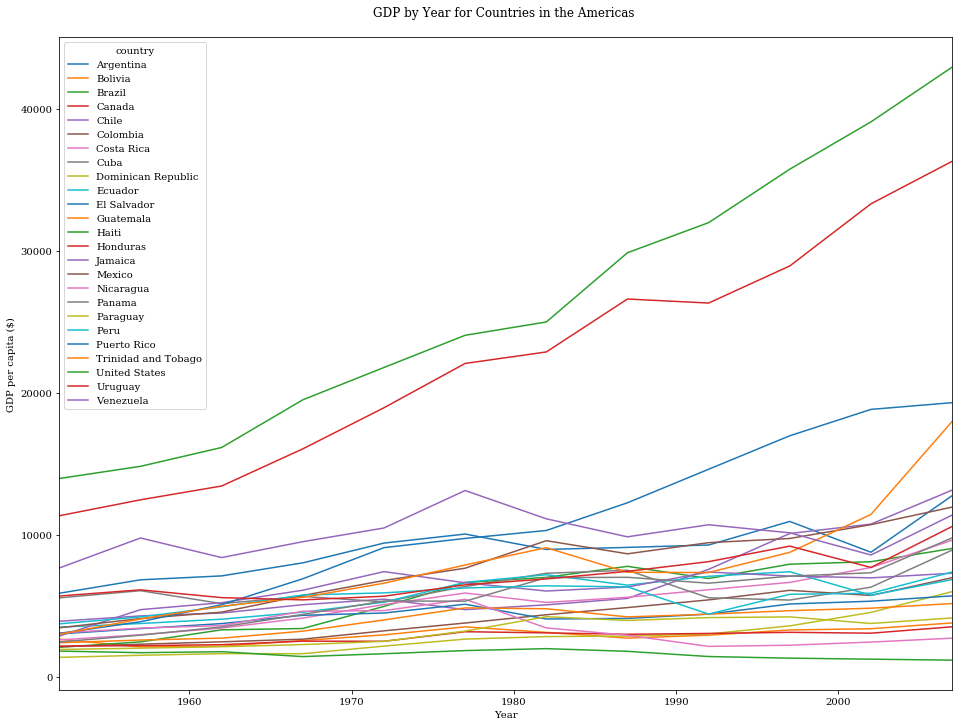

In [15]:
#Using the pandas plot() method to do a line graph
# making figsize much larger, too. 
df.T.plot(figsize=(16,12))

#once the plot method has been called, a plot object is created and we can make changes to it.
plt.title("GDP by Year for Countries in the Americas \n")
plt.ylabel("GDP per capita ($)")
plt.xlabel("Year")
plt.savefig("americas.png");

In [14]:
from matplotlib import rcParams
rcParams["font.family"] = "serif"
#rcParams["font.size"] = 12

If you are satisfied with the plot you see you may want to save it to a file, perhaps to include it in a publication. There is a function in the matplotlib.pyplot module that accomplishes this: savefig. Calling this function, e.g. with

`plt.savefig('my_figure.png')`

will save the current figure to the file my_figure.png. The file format will automatically be deduced from the file name extension (other formats are pdf, ps, eps and svg).

Note that functions in plt refer to a global figure variable and **after a figure has been displayed to the screen (e.g. with plt.show) matplotlib will make this variable refer to a new empty figure.** Therefore, make sure you call plt.savefig before the plot is displayed to the screen, otherwise you may find a file with an empty plot.

When using dataframes, data is often generated and plotted to screen in one line, and plt.savefig seems not to be a possible approach. One possibility to save the figure to file is then to

save a reference to the current figure in a local variable (with plt.gcf)
call the savefig class method from that variable.

`fig = plt.gcf() # get current figure
data.plot(kind='bar')
fig.savefig('my_figure.png')`

There's a lot going on here, let's look at two countries. 

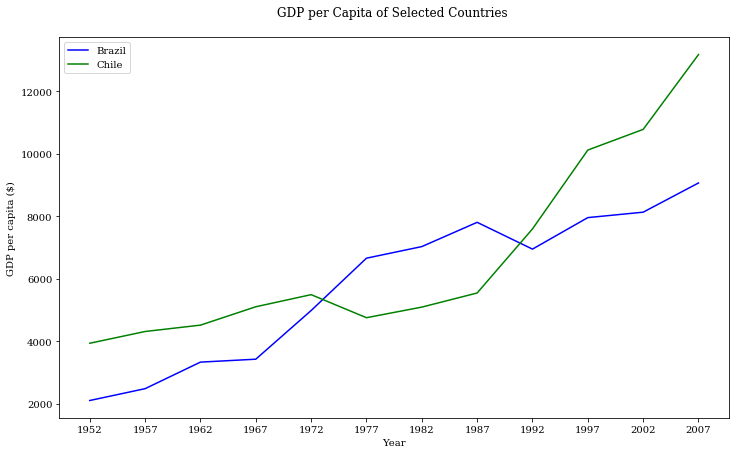

In [17]:
gdp_brazil = df.loc['Brazil']
gdp_chile = df.loc['Chile']

# have to put this above the lineplots. 
plt.figure(figsize=(12,7))

# Plot with differently-colored markers.
plt.plot(years, gdp_brazil, 'b-', label='Brazil')
plt.plot(years, gdp_chile, 'g-', label='Chile')

# Create legend.
plt.legend(loc='best')
plt.title("GDP per Capita of Selected Countries \n")
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)');

In [18]:
subset = df.loc[["Guatemala", "Costa Rica"],:]
subset

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Guatemala,2428.237769,2617.155967,2750.364446,3242.531147,4031.408271,4879.992748,4820.494790,4246.485974,4439.450840,4684.313807,4858.347495,5186.050003
Costa Rica,2627.009471,2990.010802,3460.937025,4161.727834,5118.146939,5926.876967,5262.734751,5629.915318,6160.416317,6677.045314,7723.447195,9645.061420


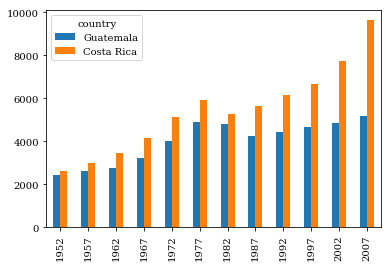

In [19]:
subset.T.plot(kind="bar");

## Scatter plots for correlating variables

In [20]:
data_all = pd.read_csv('data/gapminder_all.csv', index_col='country')
#data_all.dtypes

# we want to use continent, but it's seen as an object datatype, not a category. 
data_all.continent = data_all.continent.astype("category")
#data_all.dtypes

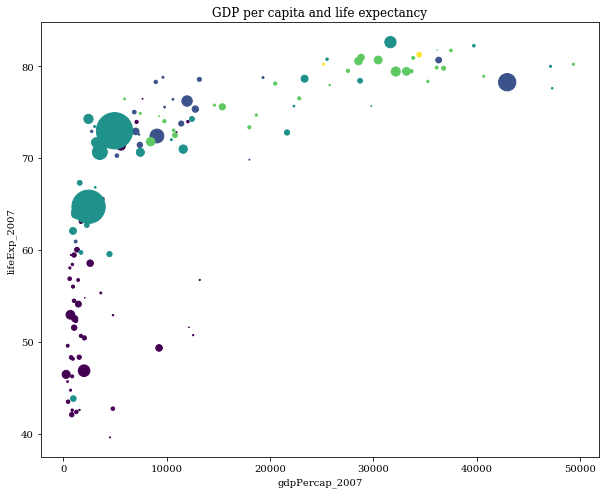

In [21]:
# progressively add parameters to refine. 

data_all.plot(kind='scatter',
              x='gdpPercap_2007',
              y='lifeExp_2007',
              #s for data that determines the size of the dot
              s=data_all['pop_2007']/1e6,
              figsize=(10,8),
              title="GDP per capita and life expectancy", 
              c=data_all['continent'].cat.codes,
              cmap="viridis", 
              #cmap="Accent"
              colorbar=False,
              legend=True);

# plt.legend(loc="lower right", title="continents", labelspacing=1)
# issue seems to be the 
#print(data_all["continent"].cat.categories)
#labels=data_all["continent"].cat.categories

**1e6** is 10 to the power of 6, or population in millions

**kind** - As seen already this determines the kind of plot to be drawn.

**x** and **y** - A column name or index that determines what data will be placed on the x and y axes of the plot

**s** - Details for this can be found in the documentation of plt.scatter. A single number or one value for each data point. Determines the size of the plotted points.